# Imports and Options

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import statistics
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords
import dataframe_image as dfi

sns.set_theme(style="darkgrid")

%matplotlib inline

In [30]:
pd.set_option('max_colwidth', None)

# Load Data

In [2]:
df = pd.read_csv(filepath_or_buffer = "./data/datframe_subtask1_2.csv")
dfi.export(df.head(), 'Rohdatensatz_head.png')
df.head()

,tweet,binaereKlassifikation,granulareKlassifikation
0,@JanZimmHHB @mopo Komisch das die Realitätsver...,OFFENSE,INSULT
1,@faznet @Gruene_Europa @SPDEuropa @CDU CDU ste...,OFFENSE,ABUSE
2,"@DLFNachrichten Die Gesichter, Namen, Religion...",OTHER,OTHER
3,@welt Wie verwirrt muss man sein um sich zu we...,OFFENSE,ABUSE
4,@hacker_1991 @torben_braga Weil die AfD den Fe...,OFFENSE,ABUSE


In [3]:
dfi.export(df.describe(), 'Rohdatensatz_describe.png')
df.describe()

,tweet,binaereKlassifikation,granulareKlassifikation
count,3031,3031,3031
unique,3031,2,4
top,@JanZimmHHB @mopo Komisch das die Realitätsver...,OTHER,OTHER
freq,1,2061,2061


# Data Analysis

In [4]:
df.iloc[:,1].value_counts()

OTHER      2061
OFFENSE     970
Name: binaereKlassifikation, dtype: int64

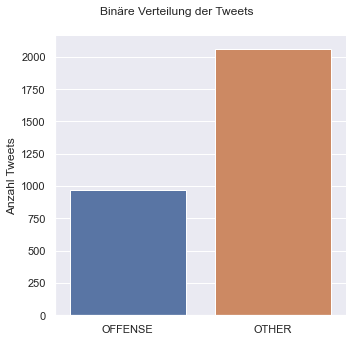

In [5]:
ax0 = sns.catplot(x="binaereKlassifikation", kind="count", data=df)

ax0.fig.suptitle('Binäre Verteilung der Tweets')
ax0.fig.subplots_adjust(top=0.9)
ax0.set(xlabel  = ""
        ,ylabel = "Anzahl Tweets")
plt.savefig("Verteilung_binaere_Klassifikation.png")
plt.show()

In [6]:
df.iloc[:,2].value_counts()

OTHER        2061
INSULT        459
ABUSE         400
PROFANITY     111
Name: granulareKlassifikation, dtype: int64

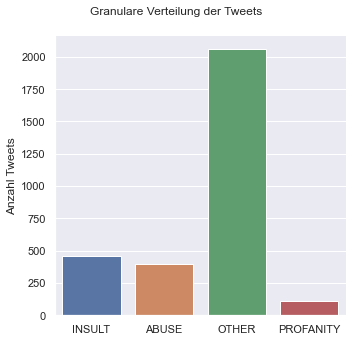

In [7]:
ax0 = sns.catplot(x="granulareKlassifikation", kind="count", data=df)

ax0.fig.suptitle('Granulare Verteilung der Tweets')
ax0.fig.subplots_adjust(top=0.9)
ax0.set(xlabel  = ""
        ,ylabel = "Anzahl Tweets")
plt.savefig("Verteilung_granulare_Klassifikation.png")
plt.show()

# Data Preparation

In [8]:
#df.sample(50)

In [9]:
buffer_array = df.iloc[:,0].to_numpy()

In [10]:
linked_list = []
hashtag_list = []
tweet_list = []
utf_list = []
emoji_list = []
w_o_punctuation_list = []

emoji_list_default = [":D",":)",":(",":/","B)","8)","xD","XD","^^","._."
              ,":-D",":-)",":-(",":-/","B-)","8-)","x-D","X-D",":'-("]

stop_words = ["|LBR|"," ",""]



for i in buffer_array:
    help_array_linked = []
    help_array_hash = []
    help_array_utf = []
    help_array_emoji = []
    help_array_w_o_punctuaton = []
    
    word_list = i.split(" ")
    index_count = 0
    for i in word_list:
        if i.startswith('\\"'): # ging mit replace irgendwie nicht
            help_list = i.split('\\""')
            for l in help_list:
                if l != '':
                    word_list[index_count] = l
                    break
        if word_list[index_count].startswith('*') and word_list[index_count].endswith('*'):
            word_list[index_count] = i.replace('*', ' ')
        if '&amp;' in word_list[index_count]:
            word_list[index_count] = i.replace('&amp;', 'und')
        if '&lt;3' in word_list[index_count]:
            word_list[index_count] = i.replace('&lt;3', '<3')
        if '&lt;' in word_list[index_count]:
            word_list[index_count] = i.replace('&lt;', 'kleiner als')
        if '&rt;' in word_list[index_count]:
            word_list[index_count] = i.replace('&rt;', 'groesser als')
        if "@" in i:
            help_array_linked.append(i)
        if "#" in i:
            help_array_hash.append(i)
            word_list[index_count] = i.replace("#","")
        if "<U+" in i:
            buffer = i.split("<")
            i = buffer[0]
#             buffer[1]=utf
            word_list[index_count] = i
            for code in buffer[1:]:
                if code[0]!="<":
                    code = "<"+code
                help_array_utf.append(code)
        if i in emoji_list_default:
            help_array_emoji.append(i)
        if i in stop_words:
            word_list.remove(i)

        index_count = index_count+1
        
    for i in help_array_linked:
        word_list.remove(i)
    for i in help_array_emoji:
        word_list.remove(i)
    for i in word_list:
        buffer_word = i.translate(str.maketrans('', '', string.punctuation))
        help_array_w_o_punctuaton.append(buffer_word)
    

        
        
    linked_list.append(help_array_linked)
    hashtag_list.append(help_array_hash)
    tweet_list.append(word_list)
    utf_list.append(help_array_utf)
    emoji_list.append(help_array_emoji)
    w_o_punctuation_list.append(help_array_w_o_punctuaton)

df["Wörter in Tweet"] = tweet_list
df["Wörter pro Tweet"]="-"
df["Tweets ohne Satzzeichen"] = w_o_punctuation_list
df["Wortlänge"] = "-"
df["Durchschnittliche Wortlänge"] = "-"
df["Verlinkungen"]=linked_list
df["Verlinkung pro Tweet"] =  "-"
df["Hashtags"]=hashtag_list
df["Hashtags pro Tweet"] =  "-"
df["utf Codes"]=utf_list
df["utf Codes pro Tweet"] =  "-"
df["Emojis"] = emoji_list
df["Emojis pro Tweet"] =  "-"



In [11]:
for index, row in df.iterrows():
    word_list = row["Wörter in Tweet"]
    char_list = row["Tweets ohne Satzzeichen"]
    link_list = row["Verlinkungen"]
    hash_list = row["Hashtags"]
    utf_list  = row["utf Codes"]
    emoj_list = row["Emojis"]
    
    word_count = len(word_list)
    link_count = len(link_list)
    hash_count = len(hash_list)
    utf_count  = len(utf_list)
    emoj_count = len(emoj_list)
    
    char_array = []
    
    for i in char_list:
        char_array.append(len(i))
    avg_length = round(statistics.mean(char_array),2)
    
    df.loc[index,"Wörter pro Tweet"] = word_count
    df.loc[index,"Wortlänge"] = char_array
    df.loc[index,"Durchschnittliche Wortlänge"] = avg_length
    df.loc[index,"Verlinkung pro Tweet"] = link_count
    df.loc[index,"Hashtags pro Tweet"] = hash_count
    df.loc[index,"utf Codes pro Tweet"] = utf_count
    df.loc[index,"Emojis pro Tweet"] = emoj_count
    

In [12]:
for x in df['Wörter in Tweet']:
    index_count = 0
    for w in x:
        x[index_count] = w.lower()
        index_count = index_count + 1


# Analyse Sonderzeichen

In [13]:
for x in df['Wörter in Tweet']:
        for w in x:
            if not re.search("^[a-zA-Z0-9,.äöüßÄÖÜ!?]*$", w):
                print(w)

87%
männer\"genannt,
empörung\"besser....herrlich,
dame\"ist
09/2015
berichten\"
33-45
männern\"hat
falsche\"richtige
12%
gibt's
22-jährigen
chemnitz:
hammer-umfrage:
-
fdp-chef
-
bleiben\"gott
\""islamophobie\""!
-
iran-sanktionen
maas/deutschland
-
inhalte\""!
-
offenheit\"mit
anderen:
40°
mohammedkult-chauvinisten!
seenotrettung™
(krimineller
schleuserfährdienst)
™
-
\""universitäten\""!
#commiesraus
klima\"und
hätte:
augenblicks-aktionismus!
100%
10%
-
-
rassismus\"den
reich\"war
(!)
(0)
(im
land!)
schutzsuchenden™
flüchtlinge™
schengen-deal
eu-weit
eu-drittländer
vorderasien-orient-afrika
jahrzehnte-lang
vater\"gesehen
leichte\"gebietsreduktion,
bundesverfassungsgerichts:
\""reichsbürger\""!
valentin-orden
(neudeutsch
valentin-museum
\""frauenfeindlich\""!
reichsbürger\"und
deutschlands:
blut-
(wie
usa)
|lbr|
ernsthaft:
(!)
tweet-impressions
\""live\"gesehen!
alternativlosigkeit\"des
(mit
-
deutschland:
-heimattreue<u+0001f499><u+0001f1e9><u+0001f1ea><u+0001f44d>
-vollhonks
widmun

top-ten
aids-test
-
fakenews-verbreiter
(lügner)
top-ten
#presseclub
diesel-pkw
pietätlos\"daran,
(u.u.
familie)
terror-regime
neutralen\"berichterstattung
keine(r)
nicht-europäisch
\""verkehrszeichen,
(sog.
phantasiezeichen),
nichtig...\"verkehrsblatt
(1971),
2-staatenlösung,
du:
richtig:
sagen:
apartheids-bejubler
kolonialismus-lover...
ansonsten:
antisemitismus-keule
recht\"auf
erhalte:
existenzrecht\"verankert,
 abwink 
lesenswert:
jordan:
palestine\"von
rest-palästinas
palästinas\"des
auch:
existenzrecht\"von
staaten/regimen
gern:
israel/palästina
iran:
all-inclusive?
;-)
viertelwahrtheiten\"poste,
einfach:
 lol 
antisemitismus-keule
blut-
antisemitismus-keule
propaganda-fuzzies,
mord-
mord-
wissenschaftlerin\"an,
propaganda-seiten
lobby:
uk\"erwerben
\""the
lobby:
usa\""
lobby:
germany\"
antisemitismus\"zu
kinderhymne\"wäre
\""wess
sing\"",
mörder-
hightech-waffen
namen:
(deutsch-)schweizer
wertvoller\"als
hetz-verein,
jahren...\"".
nahost-konflikt
mena-watch-troll-team,
-verleum

In [14]:
dfi.export(df.head(), 'Bereinigt_&_angereichert_df_head.png')
df.head()

,tweet,binaereKlassifikation,granulareKlassifikation,Wörter in Tweet,Wörter pro Tweet,Tweets ohne Satzzeichen,Wortlänge,Durchschnittliche Wortlänge,Verlinkungen,Verlinkung pro Tweet,Hashtags,Hashtags pro Tweet,utf Codes,utf Codes pro Tweet,Emojis,Emojis pro Tweet
0,@JanZimmHHB @mopo Komisch das die Realitätsver...,OFFENSE,INSULT,"[komisch, das, die, realitätsverweigerung, imm...",11,"[Komisch, das, die, Realitätsverweigerung, imm...","[7, 3, 3, 21, 5, 3, 6, 12, 9, 8, 7]",7.64,"[@JanZimmHHB, @mopo]",2,[],0,[],0,[],0
1,@faznet @Gruene_Europa @SPDEuropa @CDU CDU ste...,OFFENSE,ABUSE,"[cdu, steht, seid, strauss,, kohl,, schäuble,,...",13,"[CDU, steht, seid, Strauss, Kohl, Schäuble, vd...","[3, 5, 4, 7, 4, 8, 7, 3, 10, 11, 3, 4, 7]",5.85,"[@faznet, @Gruene_Europa, @SPDEuropa, @CDU]",4,[],0,[],0,[],0
2,"@DLFNachrichten Die Gesichter, Namen, Religion...",OTHER,OTHER,"[die, gesichter,, namen,, religion, der, täter...",10,"[Die, Gesichter, Namen, Religion, der, Täter, ...","[3, 9, 5, 8, 3, 5, 5, 3, 10, 9]",6,[@DLFNachrichten],1,[],0,[],0,[],0
3,@welt Wie verwirrt muss man sein um sich zu we...,OFFENSE,ABUSE,"[wie, verwirrt, muss, man, sein, um, sich, zu,...",28,"[Wie, verwirrt, muss, man, sein, um, sich, zu,...","[3, 8, 4, 3, 4, 2, 4, 2, 7, 3, 9, 12, 3, 6, 4,...",5.43,[@welt],1,[],0,[],0,[],0
4,@hacker_1991 @torben_braga Weil die AfD den Fe...,OFFENSE,ABUSE,"[weil, die, afd, den, ferkelfunk, abschaffen, ...",30,"[Weil, die, AfD, den, Ferkelfunk, abschaffen, ...","[4, 3, 3, 3, 10, 10, 4, 7, 5, 3, 6, 6, 11, 5, ...",5.17,"[@hacker_1991, @torben_braga]",2,[],0,[],0,[],0


In [15]:
dfi.export(df.describe(), 'Bereinigt_&_angereichert_df_describe.png')
df.describe()

,tweet,binaereKlassifikation,granulareKlassifikation,Wörter in Tweet,Wörter pro Tweet,Tweets ohne Satzzeichen,Wortlänge,Durchschnittliche Wortlänge,Verlinkungen,Verlinkung pro Tweet,Hashtags,Hashtags pro Tweet,utf Codes,utf Codes pro Tweet,Emojis,Emojis pro Tweet
count,3031,3031,3031,3031,3031,3031,3031,3031.0,3031,3031,3031,3031,3031,3031,3031,3031
unique,3031,2,4,3031,53,3031,3029,427.0,1187,18,496,9,260,13,13,4
top,@JanZimmHHB @mopo Komisch das die Realitätsver...,OTHER,OTHER,"[komisch, das, die, realitätsverweigerung, imm...",9,"[Komisch, das, die, Realitätsverweigerung, imm...","[6, 2, 3, 5, 3, 4, 2, 3, 6, 3, 4, 3, 7, 11]",5.0,[],0,[],0,[],0,[],0
freq,1,2061,2061,1,144,1,2,83.0,1119,1119,2303,2303,2523,2523,2964,2964


# Exploratory Data Analysis

In [16]:
df["binaereKlassifikation"].unique()

array(['OFFENSE', 'OTHER'], dtype=object)

In [17]:
df["granulareKlassifikation"].unique()

array(['INSULT', 'ABUSE', 'OTHER', 'PROFANITY'], dtype=object)

In [18]:
df[df["binaereKlassifikation"]=="OTHER"]["granulareKlassifikation"].unique()

array(['OTHER'], dtype=object)

In [19]:
OTHER_df = df[df["granulareKlassifikation"]=="OTHER"]
INSULT_df = df[df["granulareKlassifikation"]=="INSULT"]
ABUSE_df = df[df["granulareKlassifikation"]=="ABUSE"]
PROFANITY_df = df[df["granulareKlassifikation"]=="PROFANITY"]

In [20]:
print("Tweetlänge bei OTHER: " + str(round(OTHER_df["Wörter pro Tweet"].mean(),2)))
print("Tweetlänge bei INSULT: " + str(round(INSULT_df["Wörter pro Tweet"].mean(),2)))
print("Tweetlänge bei ABUSE: " + str(round(ABUSE_df["Wörter pro Tweet"].mean(),2)))
print("Tweetlänge bei PROFANITY: " + str(round(PROFANITY_df["Wörter pro Tweet"].mean(),2)))

Tweetlänge bei OTHER: 19.06
Tweetlänge bei INSULT: 22.0
Tweetlänge bei ABUSE: 25.44
Tweetlänge bei PROFANITY: 20.97


In [21]:
print("Durchschnittliche Wortlänge bei OTHER: " + str(round(OTHER_df["Durchschnittliche Wortlänge"].mean(),2)))
print("Durchschnittliche Wortlänge bei INSULT: " + str(round(INSULT_df["Durchschnittliche Wortlänge"].mean(),2)))
print("Durchschnittliche Wortlänge bei ABUSE: " + str(round(ABUSE_df["Durchschnittliche Wortlänge"].mean(),2)))
print("Durchschnittliche Wortlänge bei PROFANITY: " + str(round(PROFANITY_df["Durchschnittliche Wortlänge"].mean(),2)))

Durchschnittliche Wortlänge bei OTHER: 5.34
Durchschnittliche Wortlänge bei INSULT: 5.51
Durchschnittliche Wortlänge bei ABUSE: 5.85
Durchschnittliche Wortlänge bei PROFANITY: 5.18


In [22]:
print("Durchschnittliche Anzahl Hashtags bei OTHER: " + str(round(OTHER_df["Hashtags pro Tweet"].mean(),2)))
print("Durchschnittliche Anzahl Hashtags bei INSULT: " + str(round(INSULT_df["Hashtags pro Tweet"].mean(),2)))
print("Durchschnittliche Anzahl Hashtags bei ABUSE: " + str(round(ABUSE_df["Hashtags pro Tweet"].mean(),2)))
print("Durchschnittliche Anzahl Hashtags bei PROFANITY: " + str(round(PROFANITY_df["Hashtags pro Tweet"].mean(),2)))

Durchschnittliche Anzahl Hashtags bei OTHER: 0.46
Durchschnittliche Anzahl Hashtags bei INSULT: 0.5
Durchschnittliche Anzahl Hashtags bei ABUSE: 0.51
Durchschnittliche Anzahl Hashtags bei PROFANITY: 0.47


In [23]:
print("Durchschnittliche Anzahl Verlinkung bei OTHER: " + str(round(OTHER_df["Verlinkung pro Tweet"].mean(),2)))
print("Durchschnittliche Anzahl Verlinkung bei INSULT: " + str(round(INSULT_df["Verlinkung pro Tweet"].mean(),2)))
print("Durchschnittliche Anzahl Verlinkung bei ABUSE: " + str(round(ABUSE_df["Verlinkung pro Tweet"].mean(),2)))
print("Durchschnittliche Anzahl Verlinkung bei PROFANITY: " + str(round(PROFANITY_df["Verlinkung pro Tweet"].mean(),2)))

Durchschnittliche Anzahl Verlinkung bei OTHER: 1.48
Durchschnittliche Anzahl Verlinkung bei INSULT: 1.93
Durchschnittliche Anzahl Verlinkung bei ABUSE: 1.72
Durchschnittliche Anzahl Verlinkung bei PROFANITY: 0.63


In [24]:
print("Durchschnittliche Anzahl Emojis bei OTHER: " + str(round(OTHER_df["Emojis pro Tweet"].mean(),2)))
print("Durchschnittliche Anzahl Emojis bei INSULT: " + str(round(INSULT_df["Emojis pro Tweet"].mean(),2)))
print("Durchschnittliche Anzahl Emojis bei ABUSE: " + str(round(ABUSE_df["Emojis pro Tweet"].mean(),2)))
print("Durchschnittliche Anzahl Emojis bei PROFANITY: " + str(round(PROFANITY_df["Emojis pro Tweet"].mean(),2)))

Durchschnittliche Anzahl Emojis bei OTHER: 0.03
Durchschnittliche Anzahl Emojis bei INSULT: 0.01
Durchschnittliche Anzahl Emojis bei ABUSE: 0.0
Durchschnittliche Anzahl Emojis bei PROFANITY: 0.05


In [25]:
print("Durchschnittliche Anzahl utf Codes bei OTHER: " + str(round(OTHER_df["utf Codes pro Tweet"].mean(),2)))
print("Durchschnittliche Anzahl utf Codes bei INSULT: " + str(round(INSULT_df["utf Codes pro Tweet"].mean(),2)))
print("Durchschnittliche Anzahl utf Codes bei ABUSE: " + str(round(ABUSE_df["utf Codes pro Tweet"].mean(),2)))
print("Durchschnittliche Anzahl utf Codes bei PROFANITY: " + str(round(PROFANITY_df["utf Codes pro Tweet"].mean(),2)))

Durchschnittliche Anzahl utf Codes bei OTHER: 0.34
Durchschnittliche Anzahl utf Codes bei INSULT: 0.34
Durchschnittliche Anzahl utf Codes bei ABUSE: 0.56
Durchschnittliche Anzahl utf Codes bei PROFANITY: 0.27


In [25]:
#df.sample(n = 50, random_state = 4711)

## Plots

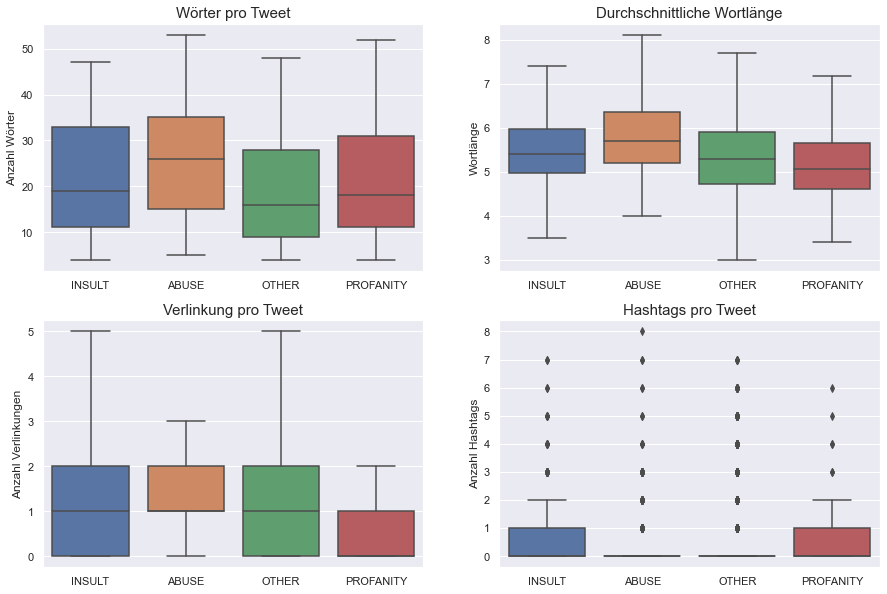

In [26]:
fig, axes = plt.subplots(nrows = 2
                         ,ncols = 2
                         ,figsize=(15,10)
                         ,sharex = False
                        )

ax0 = sns.boxplot(data = df
                  ,x = "granulareKlassifikation"
                  ,y = "Wörter pro Tweet"
                  ,showfliers = False
                  ,ax = axes[0,0]
                 )

ax0.set_title("Wörter pro Tweet", fontsize = 15)
ax0.set(xlabel  = ""
        ,ylabel = "Anzahl Wörter")

ax1 = sns.boxplot(data = df
                  ,x = "granulareKlassifikation"
                  ,y = "Durchschnittliche Wortlänge"
                  ,showfliers = False
                  ,ax = axes[0,1]
                 )
ax1.set_title("Durchschnittliche Wortlänge", fontsize = 15)
ax1.set(xlabel  = ""
        ,ylabel = "Wortlänge")


ax2 = sns.boxplot(data = df
                  ,x = "granulareKlassifikation"
                  ,y = "Verlinkung pro Tweet"
                  ,showfliers = False
                  ,ax = axes[1,0]
                 )

ax2.set_title("Verlinkung pro Tweet", fontsize = 15)
ax2.set(xlabel  = ""
        ,ylabel = "Anzahl Verlinkungen")

ax3 = sns.boxplot(data = df
                  ,x = "granulareKlassifikation"
                  ,y = "Hashtags pro Tweet"
#                   ,showfliers = False
                  ,ax = axes[1,1]
                 )

ax3.set_title("Hashtags pro Tweet", fontsize = 15)
ax3.set(xlabel  = ""
        ,ylabel = "Anzahl Hashtags")

plt.savefig("Quantitave_Exploration.png")

plt.show()
# ax4 = sns.boxplot(data = df
#                   ,x = "granulareKlassifikation"
#                   ,y = "utf Codes pro Tweet"
#                   ,showfliers = False
#                   ,ax = axes[2,0]
#                  )

# ax5 = sns.boxplot(data = df
#                   ,x = "granulareKlassifikation"
#                   ,y = "Emojis pro Tweet"
#                   ,showfliers = False
#                   ,ax = axes[2,1]
#                  )

In [25]:
# fig, axes = plt.subplots(nrows = 2
#                          ,ncols = 2
#                          ,figsize=(15,10)
# #                          ,sharex = True
#                         )

# ax0 = sns.violinplot(data = df
#                       ,x = "granulareKlassifikation"
#                       ,y = "Wörter pro Tweet"
#     #                   ,showfliers = False
#                       ,ax = axes[0,0]
#                      )

# ax1 = sns.violinplot(data = df
#                   ,x = "granulareKlassifikation"
#                   ,y = "Durchschnittliche Wortlänge"
# #                   ,showfliers = False
#                   ,ax = axes[0,1]
#                  )

# ax2 = sns.violinplot(data = df
#                   ,x = "granulareKlassifikation"
#                   ,y = "Verlinkung pro Tweet"
# #                   ,showfliers = False
#                   ,ax = axes[1,0]
#                  )

# ax3 = sns.violinplot(data = df
#                   ,x = "granulareKlassifikation"
#                   ,y = "Hashtags pro Tweet"
# #                   ,showfliers = False
#                   ,ax = axes[1,1]
#                  )

# # ax4 = sns.violinplot(data = df
# #                   ,x = "granulareKlassifikation"
# #                   ,y = "utf Codes pro Tweet"
# #                   ,showfliers = False
# #                   ,ax = axes[2,0]
# #                  )

# # ax5 = sns.violinplot(data = df
# #                   ,x = "granulareKlassifikation"
# #                   ,y = "Emojis pro Tweet"
# #                   ,showfliers = False
# #                   ,ax = axes[2,1]
# #                  )

In [27]:
nltk.download('stopwords')
# Combine german stopwords from nltk with additional stopwords
german_stopwords1 = []
with open('./data/stop_words_german.txt', encoding="utf-8") as f:
    for line in f:
        line = line.replace('\n','')
        german_stopwords1.append(line)

german_stopwords2 = stopwords.words("german")

german_stopwords = german_stopwords1 + german_stopwords2

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ssettertobulte\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
# words in tweet as one string 
data = df
data["tweets_clean"] = [" ".join(word) for word in data["Wörter in Tweet"]] 

# drop unicode emojis and LBR
new_tweet_ls = []
for tweet in data.tweets_clean:
    tweet_sp = tweet.split()
    for word in tweet_sp:
        if any(x in word for x in ["000", "LBR", "lbr"]) :
            tweet = tweet.replace(word, "")
        
    new_tweet_ls.append(tweet)

data["tweets_clean"] = new_tweet_ls


In [29]:
dfi.export(data.sample(5, random_state=4711), 'Finaler_Datensatz.png')
data.sample(5, random_state=4711)

,tweet,binaereKlassifikation,granulareKlassifikation,Wörter in Tweet,Wörter pro Tweet,Tweets ohne Satzzeichen,Wortlänge,Durchschnittliche Wortlänge,Verlinkungen,Verlinkung pro Tweet,Hashtags,Hashtags pro Tweet,utf Codes,utf Codes pro Tweet,Emojis,Emojis pro Tweet,tweets_clean
488,Schon alleine dass dieser @Sky Quatschkopf Lüg...,OFFENSE,INSULT,"[schon, alleine, dass, dieser, quatschkopf, lü...",9,"[Schon, alleine, dass, dieser, Quatschkopf, Lü...","[5, 7, 4, 6, 11, 5, 8, 4, 4]",6,[@Sky],1,[#fcsp],1,[],0,[],0,schon alleine dass dieser quatschkopf lügen ge...
341,.... und wenn jemand ein gutes (kostenloses) T...,OTHER,OTHER,"[...., und, wenn, jemand, ein, gutes, (kostenl...",28,"[, und, wenn, jemand, ein, gutes, kostenloses,...","[0, 3, 4, 6, 3, 5, 11, 4, 3, 13, 10, 5, 4, 5, ...",5.25,[],0,[],0,[],0,[:-(],1,.... und wenn jemand ein gutes (kostenloses) t...
2729,@Bea76190653 @Tapetenlama Ich habe jetzt dreim...,OTHER,OTHER,"[ich, habe, jetzt, dreimal, nacktpremiere, gel...",11,"[Ich, habe, jetzt, dreimal, Nacktpremiere, gel...","[3, 4, 5, 7, 13, 7, 3, 5, 5, 4, 5]",5.55,"[@Bea76190653, @Tapetenlama]",2,[],0,[],0,[],0,ich habe jetzt dreimal nacktpremiere gelesen u...
293,"erkel hat geschworen, \""""den Nutzen des Deutsc...",OFFENSE,ABUSE,"[erkel, hat, geschworen,, den, nutzen, des, de...",40,"[erkel, hat, geschworen, den, Nutzen, des, Deu...","[5, 3, 10, 3, 6, 3, 9, 6, 2, 6, 3, 3, 4, 4, 2,...",5.5,[],0,[],0,[<U+0001F914>],1,[],0,"erkel hat geschworen, den nutzen des deutschen..."
1459,Shira und Amihai sind die Eltern des verstorbe...,OTHER,OTHER,"[shira, und, amihai, sind, die, eltern, des, v...",21,"[Shira, und, Amihai, sind, die, Eltern, des, v...","[5, 3, 6, 4, 3, 6, 3, 12, 5, 5, 11, 8, 4, 5, 4...",5.52,[],0,[],0,[],0,[],0,shira und amihai sind die eltern des verstorbe...


In [ ]:
data.to_csv('./data/prepared_dataframe.csv',index=False)